<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-10-22 20:18:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.9MB/s    in 2.6s    

2025-10-22 20:18:22 (57.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


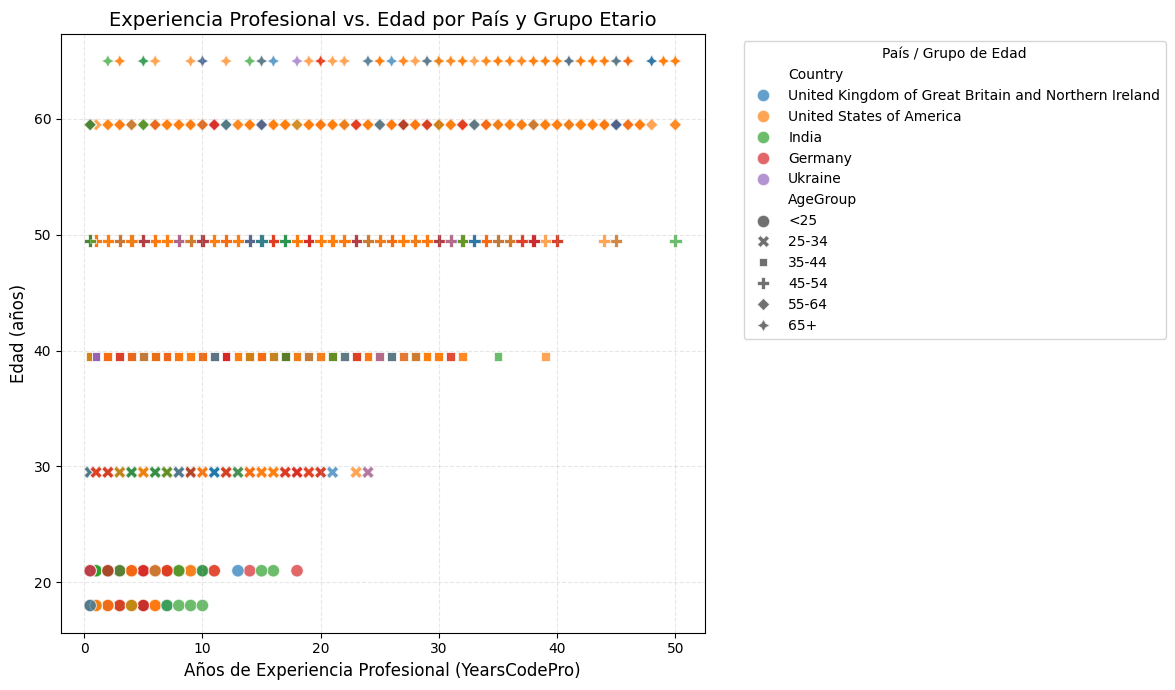

In [4]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas necesarias
query = """
SELECT Age, YearsCodePro, Country
FROM main
WHERE Age IS NOT NULL AND YearsCodePro IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- CONVERTIR EDAD A NÚMERICO ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)

# --- CONVERTIR YEARSCODEPRO A NÚMERICO ---
def convert_years(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if x in ["less than 1 year", "under 1 year"]:
            return 0.5
        elif x in ["more than 50 years", "over 50 years"]:
            return 50
        else:
            try:
                return float(x)
            except:
                return None
    return x

df["YearsCodeProNum"] = df["YearsCodePro"].apply(convert_years)

# --- ELIMINAR FILAS CON DATOS INVÁLIDOS ---
df = df.dropna(subset=["AgeNum", "YearsCodeProNum", "Country"])

# --- CREAR GRUPOS DE EDAD ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df["AgeGroup"] = pd.cut(df["AgeNum"], bins=bins, labels=labels, right=True)

# --- SELECCIONAR LOS 5 PRINCIPALES PAÍSES PARA VISUALIZACIÓN ---
top_countries = df["Country"].value_counts().head(5).index
df_top = df[df["Country"].isin(top_countries)]

# --- SCATTER PLOT ---
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=df_top,
    x="YearsCodeProNum",
    y="AgeNum",
    hue="Country",
    style="AgeGroup",
    alpha=0.7,
    s=80
)

plt.title("Experiencia Profesional vs. Edad por País y Grupo Etario", fontsize=14)
plt.xlabel("Años de Experiencia Profesional (YearsCodePro)", fontsize=12)
plt.ylabel("Edad (años)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="País / Grupo de Edad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


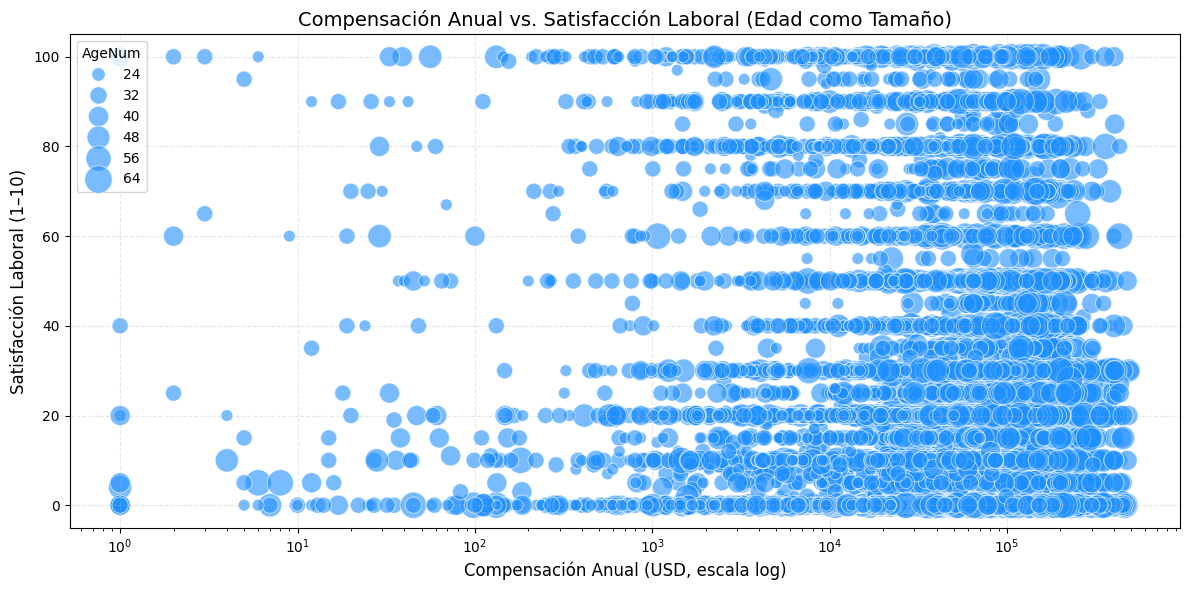

In [5]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas necesarias
query = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- CONVERTIR EDAD A NÚMERICO ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)

# --- LIMPIEZA DE DATOS ---
df["JobSatNum"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["ConvertedCompYearly", "JobSatNum", "AgeNum"])

# Filtrar salarios extremos para mejor visualización
df = df[df["ConvertedCompYearly"] < 500000]

# --- BUBBLE PLOT ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x="ConvertedCompYearly",
    y="JobSatNum",
    size="AgeNum",
    sizes=(50, 400),
    alpha=0.6,
    color="dodgerblue",
    edgecolor="white"
)

plt.xscale("log")  # Escala logarítmica para salarios
plt.title("Compensación Anual vs. Satisfacción Laboral (Edad como Tamaño)", fontsize=14)
plt.xlabel("Compensación Anual (USD, escala log)", fontsize=12)
plt.ylabel("Satisfacción Laboral (1–10)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_588/569742368.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_df = df_exp.groupby(["Language", "AgeGroup"]).size().reset_index(name="Count")


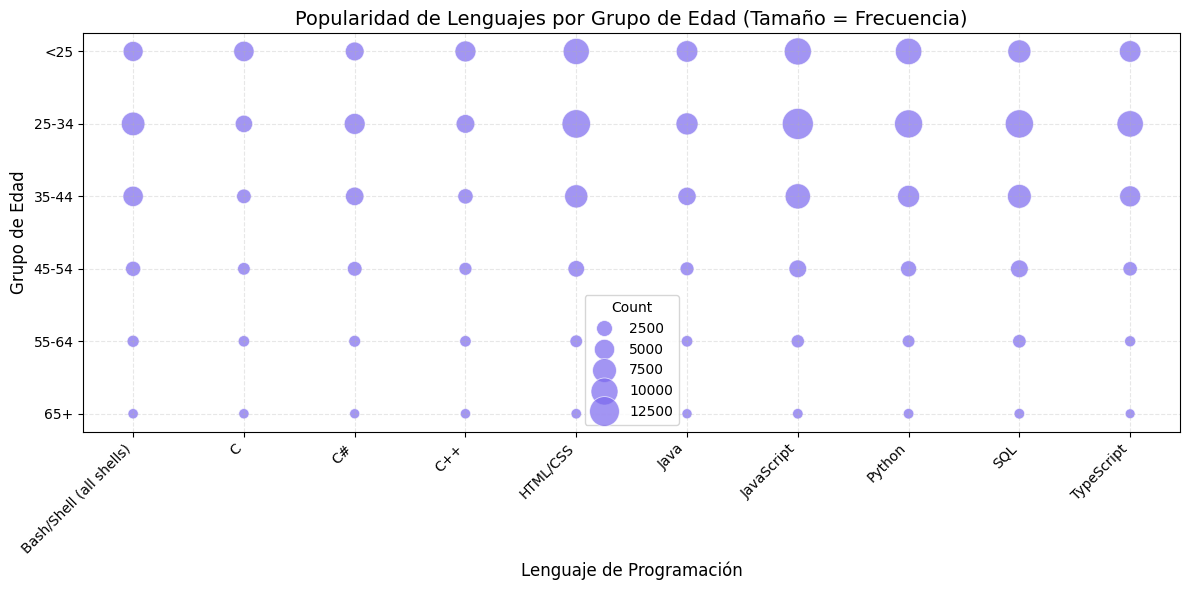

In [6]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas necesarias
query = """
SELECT LanguageHaveWorkedWith, Age
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- CONVERTIR EDAD A NÚMERICO ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)
df = df.dropna(subset=["AgeNum"])

# --- CREAR GRUPOS DE EDAD ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df["AgeGroup"] = pd.cut(df["AgeNum"], bins=bins, labels=labels, right=True)

# --- EXPLODE DE LENGUAJES ---
df_exp = df.assign(Language=df["LanguageHaveWorkedWith"].str.split(";"))
df_exp = df_exp.explode("Language")
df_exp["Language"] = df_exp["Language"].str.strip()
df_exp = df_exp.dropna(subset=["Language"])

# --- FRECUENCIA POR LENGUAJE Y GRUPO DE EDAD ---
freq_df = df_exp.groupby(["Language", "AgeGroup"]).size().reset_index(name="Count")

# --- SELECCIONAR TOP 10 LENGUAJES ---
top_languages = df_exp["Language"].value_counts().head(10).index
freq_df_top = freq_df[freq_df["Language"].isin(top_languages)]

# --- BUBBLE PLOT ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=freq_df_top,
    x="Language",
    y="AgeGroup",
    size="Count",
    sizes=(50, 500),
    alpha=0.7,
    color="mediumslateblue",
    edgecolor="white"
)

plt.title("Popularidad de Lenguajes por Grupo de Edad (Tamaño = Frecuencia)", fontsize=14)
plt.xlabel("Lenguaje de Programación", fontsize=12)
plt.ylabel("Grupo de Edad", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


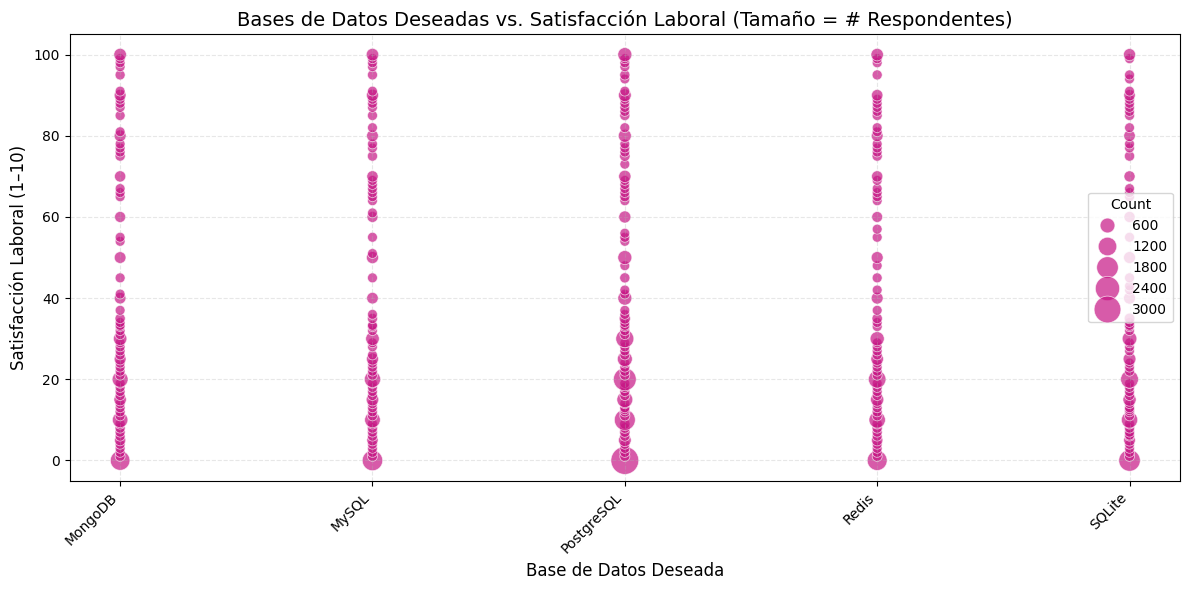

In [7]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columnas necesarias
query = """
SELECT DatabaseWantToWorkWith, JobSatPoints_6
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir JobSat a numérico ---
df["JobSatNum"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["JobSatNum"])

# --- Explode de bases de datos (pueden ser múltiples separadas por ;) ---
df_exp = df.assign(Database=df["DatabaseWantToWorkWith"].str.split(";"))
df_exp = df_exp.explode("Database")
df_exp["Database"] = df_exp["Database"].str.strip()
df_exp = df_exp.dropna(subset=["Database"])

# --- Seleccionar top 5 bases de datos más deseadas ---
top_dbs = df_exp["Database"].value_counts().head(5).index
df_top = df_exp[df_exp["Database"].isin(top_dbs)]

# --- Contar frecuencia por base de datos y nivel de satisfacción ---
freq_df = df_top.groupby(["Database", "JobSatNum"]).size().reset_index(name="Count")

# --- Bubble plot ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=freq_df,
    x="Database",
    y="JobSatNum",
    size="Count",
    sizes=(50, 400),
    alpha=0.7,
    color="mediumvioletred",
    edgecolor="white"
)

plt.title("Bases de Datos Deseadas vs. Satisfacción Laboral (Tamaño = # Respondentes)", fontsize=14)
plt.xlabel("Base de Datos Deseada", fontsize=12)
plt.ylabel("Satisfacción Laboral (1–10)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


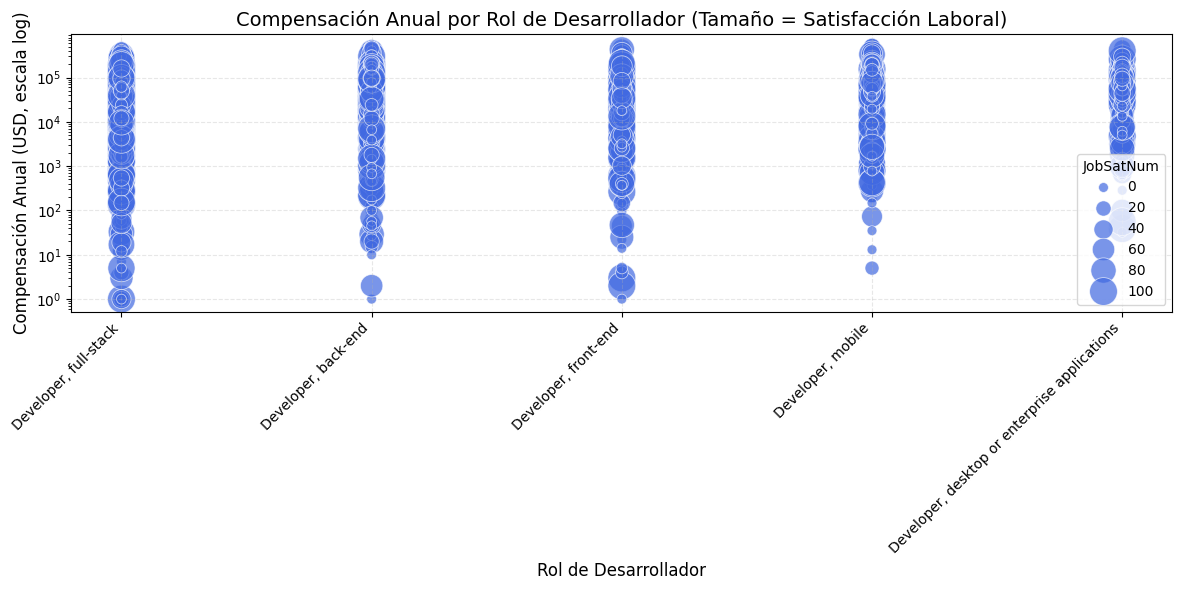

In [8]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Cargar columnas necesarias
query = """
SELECT DevType, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir JobSat a numérico ---
df["JobSatNum"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["JobSatNum"])

# --- Explode DevType (pueden ser múltiples roles separados por ;) ---
df_exp = df.assign(DevRole=df["DevType"].str.split(";"))
df_exp = df_exp.explode("DevRole")
df_exp["DevRole"] = df_exp["DevRole"].str.strip()
df_exp = df_exp.dropna(subset=["DevRole"])

# --- Seleccionar top 5 roles más frecuentes ---
top_roles = df_exp["DevRole"].value_counts().head(5).index
df_top = df_exp[df_exp["DevRole"].isin(top_roles)]

# --- Filtrar salarios extremos para mejor visualización ---
df_top = df_top[df_top["ConvertedCompYearly"] < 500000]

# --- Bubble plot ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_top,
    x="DevRole",
    y="ConvertedCompYearly",
    size="JobSatNum",
    sizes=(50, 400),
    alpha=0.7,
    color="royalblue",
    edgecolor="white"
)

plt.yscale("log")  # Escala logarítmica para salarios
plt.title("Compensación Anual por Rol de Desarrollador (Tamaño = Satisfacción Laboral)", fontsize=14)
plt.xlabel("Rol de Desarrollador", fontsize=12)
plt.ylabel("Compensación Anual (USD, escala log)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_588/1236878604.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_df = df_top.groupby(["Tool", "AgeGroup"]).size().reset_index(name="Count")


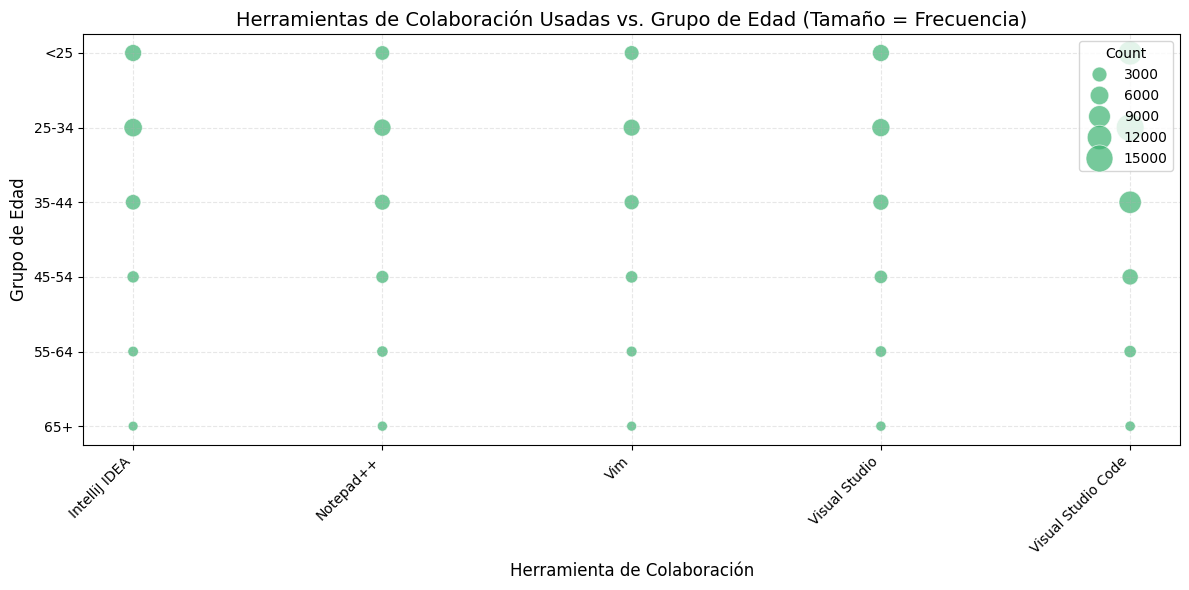

In [9]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columnas necesarias
query = """
SELECT NEWCollabToolsHaveWorkedWith, Age
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir Age a numérico ---
def convert_age(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace(" years old", "").strip()
        if "-" in age_str:
            low, high = age_str.split("-")
            return (int(low) + int(high)) / 2
        elif "Under" in age_str:
            return 18
        elif "65" in age_str:
            return 65
        else:
            try:
                return int(age_str)
            except:
                return None
    return None

df["AgeNum"] = df["Age"].apply(convert_age)
df = df.dropna(subset=["AgeNum"])

# --- Crear grupos de edad ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df["AgeGroup"] = pd.cut(df["AgeNum"], bins=bins, labels=labels, right=True)

# --- Explode de herramientas ---
df_exp = df.assign(Tool=df["NEWCollabToolsHaveWorkedWith"].str.split(";"))
df_exp = df_exp.explode("Tool")
df_exp["Tool"] = df_exp["Tool"].str.strip()
df_exp = df_exp.dropna(subset=["Tool"])

# --- Seleccionar top 5 herramientas más populares ---
top_tools = df_exp["Tool"].value_counts().head(5).index
df_top = df_exp[df_exp["Tool"].isin(top_tools)]

# --- Contar frecuencia por herramienta y grupo de edad ---
freq_df = df_top.groupby(["Tool", "AgeGroup"]).size().reset_index(name="Count")

# --- Bubble plot ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=freq_df,
    x="Tool",
    y="AgeGroup",
    size="Count",
    sizes=(50, 400),
    alpha=0.7,
    color="mediumseagreen",
    edgecolor="white"
)

plt.title("Herramientas de Colaboración Usadas vs. Grupo de Edad (Tamaño = Frecuencia)", fontsize=14)
plt.xlabel("Herramienta de Colaboración", fontsize=12)
plt.ylabel("Grupo de Edad", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



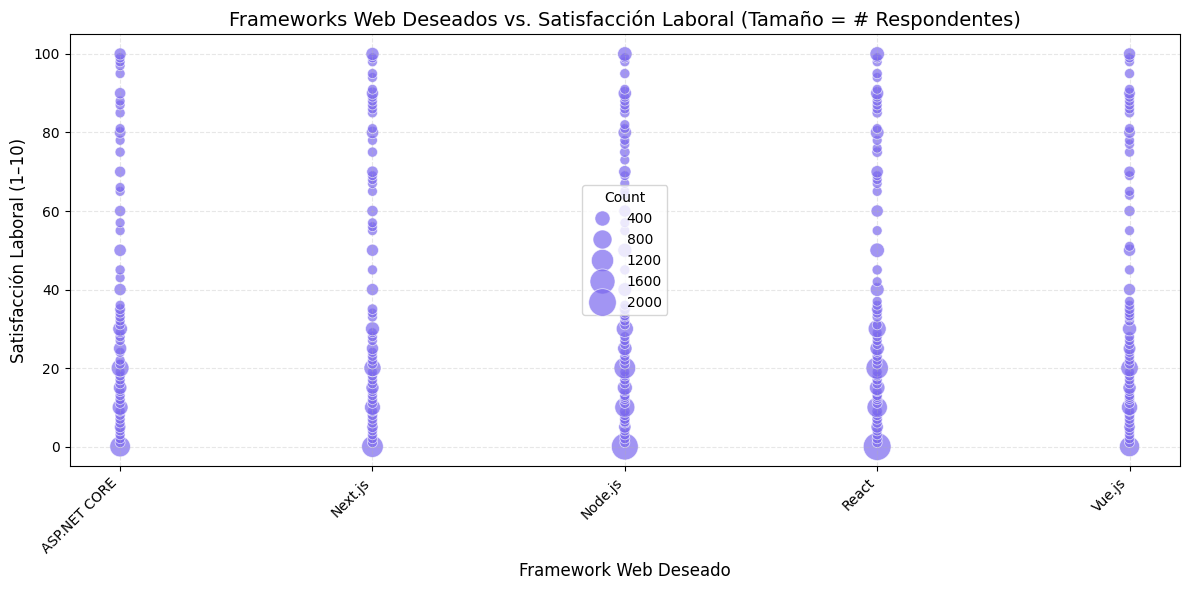

In [10]:
##Write your code here
# Activar modo inline
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columnas necesarias
query = """
SELECT WebframeWantToWorkWith, JobSatPoints_6
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir JobSat a numérico ---
df["JobSatNum"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df = df.dropna(subset=["JobSatNum"])

# --- Explode de frameworks ---
df_exp = df.assign(Framework=df["WebframeWantToWorkWith"].str.split(";"))
df_exp = df_exp.explode("Framework")
df_exp["Framework"] = df_exp["Framework"].str.strip()
df_exp = df_exp.dropna(subset=["Framework"])

# --- Seleccionar top 5 frameworks más deseados ---
top_frameworks = df_exp["Framework"].value_counts().head(5).index
df_top = df_exp[df_exp["Framework"].isin(top_frameworks)]

# --- Contar frecuencia por framework y nivel de satisfacción ---
freq_df = df_top.groupby(["Framework", "JobSatNum"]).size().reset_index(name="Count")

# --- Bubble plot ---
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=freq_df,
    x="Framework",
    y="JobSatNum",
    size="Count",
    sizes=(50, 400),
    alpha=0.7,
    color="mediumslateblue",
    edgecolor="white"
)

plt.title("Frameworks Web Deseados vs. Satisfacción Laboral (Tamaño = # Respondentes)", fontsize=14)
plt.xlabel("Framework Web Deseado", fontsize=12)
plt.ylabel("Satisfacción Laboral (1–10)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
